In [16]:
import os
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA = True

class DogsVsCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    LABELS = {CATS:0,DOGS:1}
    training_data = []
    catcount = 0
    dogcount = 0
    
    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            #Looping all the images in the directory
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label,f)
                        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])
                        #print(np.eye(2)[self.LABELS[label]])

                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1

                    except Exception as e:
                        pass
            
            
        np.random.shuffle(self.training_data)
        np.save("training_data.npy",self.training_data)
        print("Cats:", self.catcount)
        print("Dogs:", self.dogcount)

if REBUILD_DATA:
    dogsvcats = DogsVsCats()
    dogsvcats.make_training_data()
                
    

PetImages/Cat


100%|████████████████████████████████████████████████████████████████████████████| 12501/12501 [02:08<00:00, 97.39it/s]


PetImages/Dog


100%|███████████████████████████████████████████████████████████████████████████| 12501/12501 [01:52<00:00, 110.82it/s]


Cats: 12476
Dogs: 12470


In [18]:
training_data = np.load("training_data.npy", allow_pickle=True)

In [19]:
print(len(training_data))

24946


In [20]:
print(training_data[1])

[array([[ 18,  75,  33, ...,  87,  80,  79],
        [ 16,  37,  72, ...,  94,  29,  42],
        [ 16,  15,  15, ...,  72,  53,  45],
        ...,
        [122, 128,  90, ..., 196, 183, 180],
        [122, 137, 150, ..., 209, 202, 194],
        [140, 150, 158, ..., 214, 204, 201]], dtype=uint8) array([0., 1.])]


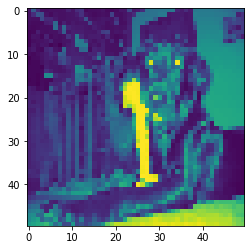

In [23]:
import matplotlib.pyplot as plt
plt.imshow(training_data[1][0],)
plt.show()

In [24]:
training_data[1][1]

array([0., 1.])